In [1]:
import requests
import zipfile
import os

# URL of the dataset
url = 'https://www.dropbox.com/scl/fi/u2w4eoeiksyae1pn0di6d/IndianSignLanguage.zip?rlkey=38ztp9zkqvhdvusoeet3a9qex&dl=1'  # Set dl=1 to download directly

# Download the file
response = requests.get(url)
zip_path = 'IndianSignLanguage.zip'

# Save the ZIP file
with open(zip_path, 'wb') as f:
    f.write(response.content)

print("Dataset downloaded successfully.")

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('IndianSignLanguage')

print("Dataset extracted successfully.")

Dataset downloaded successfully.
Dataset extracted successfully.


Metadata Summary:
Total number of images: 42000
Number of classes: 35
Class distribution:
   ClassID  NumImages
0        1       1200
1        2       1200
2        3       1200
3        4       1200
4        5       1200
5        6       1200
6        7       1200
7        8       1200
8        9       1200
9        A       1200
10       B       1200
11       C       1200
12       D       1200
13       E       1200
14       F       1200
15       G       1200
16       H       1200
17       I       1200
18       J       1200
19       K       1200
20       L       1200
21       M       1200
22       N       1200
23       O       1200
24       P       1200
25       Q       1200
26       R       1200
27       S       1200
28       T       1200
29       U       1200
30       V       1200
31       W       1200
32       X       1200
33       Y       1200
34       Z       1200



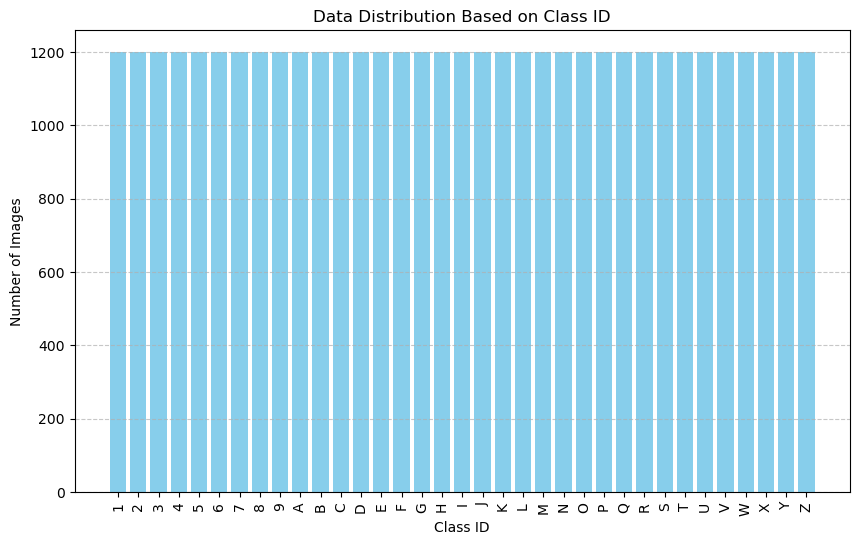

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Function to load the dataset and extract metadata
def extract_metadata(dataset_path):
    data = []
    class_distribution = {}

    # Loop through each class directory
    for class_dir in os.listdir(dataset_path):
        # Skip hidden files or directories (e.g., .DS_Store on macOS)
        if class_dir.startswith('.'):
            continue

        # Use the directory name as the class label (no conversion to int)
        class_id = class_dir
        class_images = os.listdir(os.path.join(dataset_path, class_dir))

        # Count the number of images in the class directory
        class_distribution[class_id] = len(class_images)
        data.append((class_id, len(class_images)))

    # Convert data to DataFrame for easier manipulation and visualization
    df = pd.DataFrame(data, columns=['ClassID', 'NumImages'])

    # Calculate total number of images
    total_images = df['NumImages'].sum()

    # Display metadata
    print("Metadata Summary:")
    print("=================")
    print("Total number of images:", total_images)
    print("Number of classes:", len(df))
    print("Class distribution:")
    print(df)
    print("")

    return df, class_distribution

# Path to the dataset
dataset_path = "IndianSignLanguage/data"

# Extract metadata
metadata_df, class_distribution = extract_metadata(dataset_path)

# Plot the data distribution based on class ID
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Class ID')
plt.ylabel('Number of Images')
plt.title('Data Distribution Based on Class ID')
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many classes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
